# Customer Churn Rate Analysis
## by Fares Ahmed

## Investigation Overview

A manager at the bank is disturbed with more and more customers cancelling their credit card services. They would really appreciate if one could predict for them who is going to get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction and that's what we are going to do getting a close look on each feature and its effect on the customers.

## Dataset Overview

This dataset consists of 10,000 customer's, providing their demographic info and also their credit card usage in the whole previous year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import cufflinks as cf
cf.go_offline()

%matplotlib inline
pd.set_option('max_columns', None)
mpl.rcParams['font.size'] = 12


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
%config InlineBackend.figure_format = 'retina'

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('BankChurners.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Data distribution

Having a first look at the data we can see that almost 84 percent of the customers are still subscribed, so the goal here is to find some trends that differentiate them from the cancellers so that we can alter their decision and win the customer back.

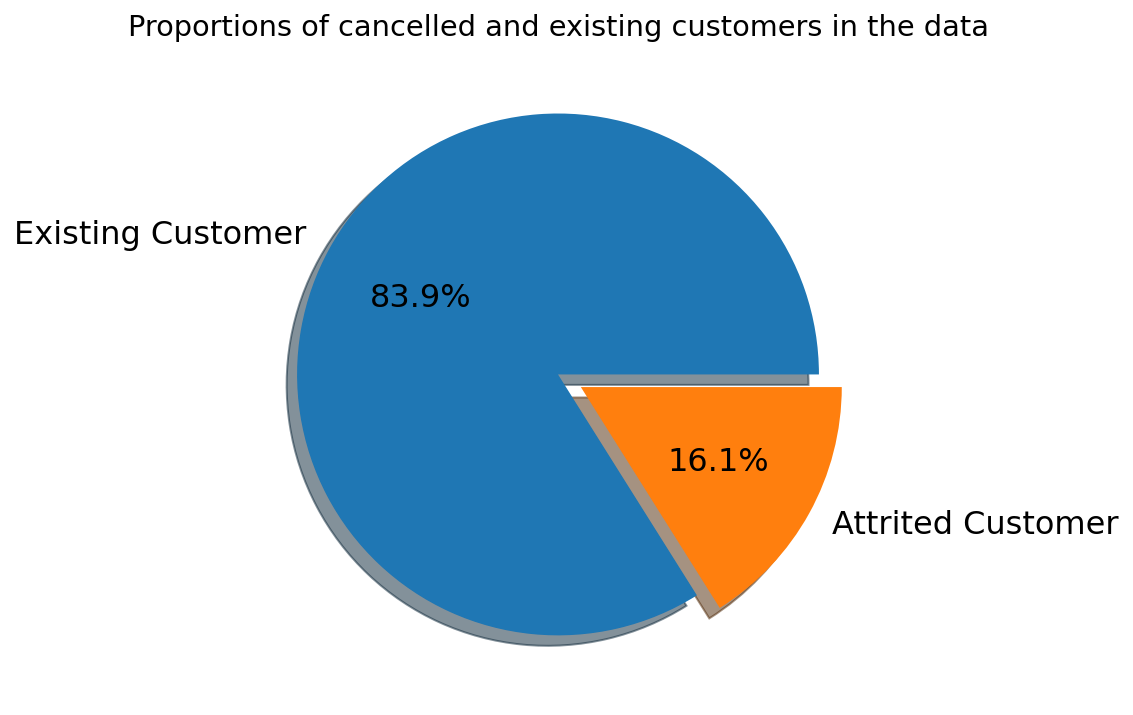

In [3]:
plt.figure(figsize = (10, 6))
df['Attrition_Flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, label='',textprops={'fontsize': 16},);
plt.title('Proportions of cancelled and existing customers in the data');

In [4]:
# dropping unneeded features
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

def change_to_bool(x):
    if x == 'Existing Customer':
        return 1
    else:
        return 0
    
df.Attrition_Flag = df.Attrition_Flag.apply(change_to_bool)
df.rename(columns={"Attrition_Flag": "Existing_Customer"},inplace=True)

## Demographic features had almost zero insights

As I looked at each demographic feature I didn't find any statistical significance and I almost lost hope in the given features and shifted my thinking to feature engineering, maybe it will hold some insights.

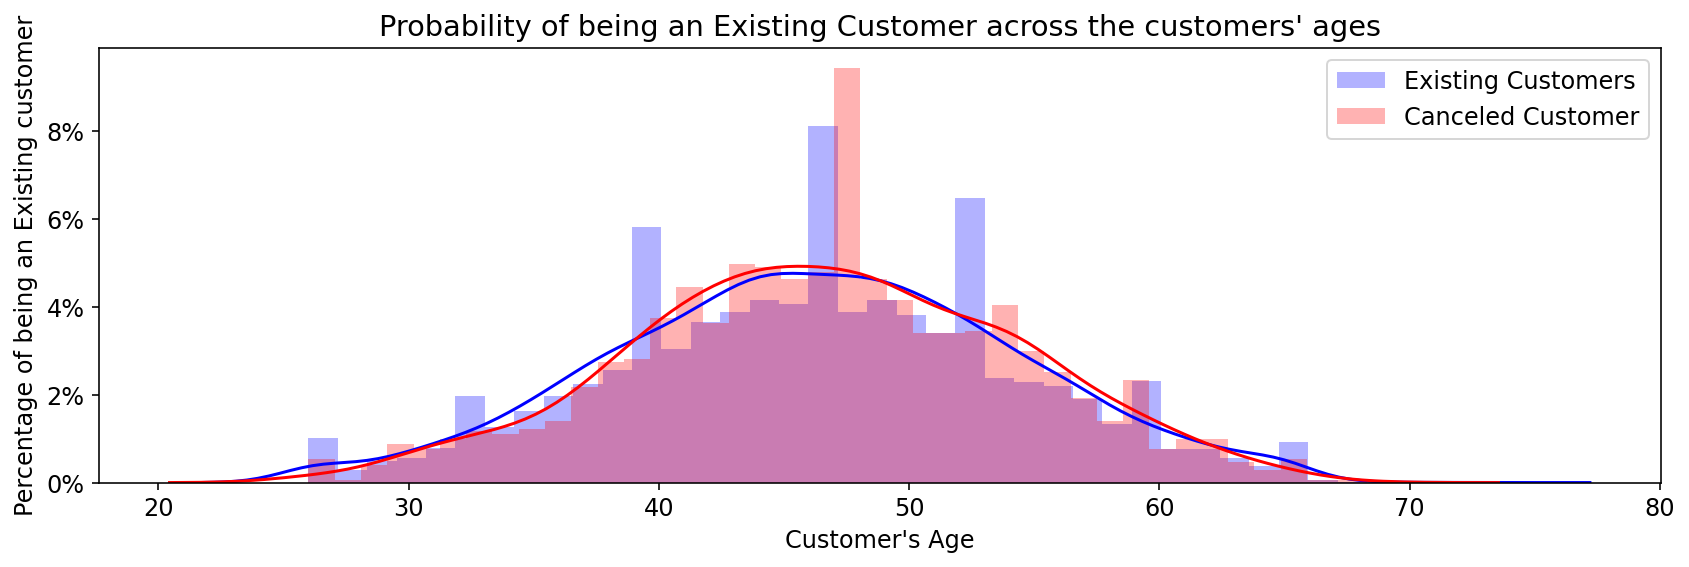

In [5]:
plt.figure(figsize=(14,4))
f = sns.distplot(df[df.Existing_Customer == 1].Customer_Age,bins=40,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Customer_Age,bins=40,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.legend()
plt.title("Probability of being an Existing Customer across the customers' ages");
plt.xlabel("Customer's Age");
vals = f.get_yticks()
f.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);

plt.ylabel('Percentage of being an Existing customer');


A sample of a demographic feature and it's clear that density curve is almost identical across the customers' ages.

## The trends lies in the customers' usage 

Like we mentioned, the demographic features were a bit underwhelming, but things started to brighten up as I checked the customer's usage through the previous year as shown in the next couple of figures.

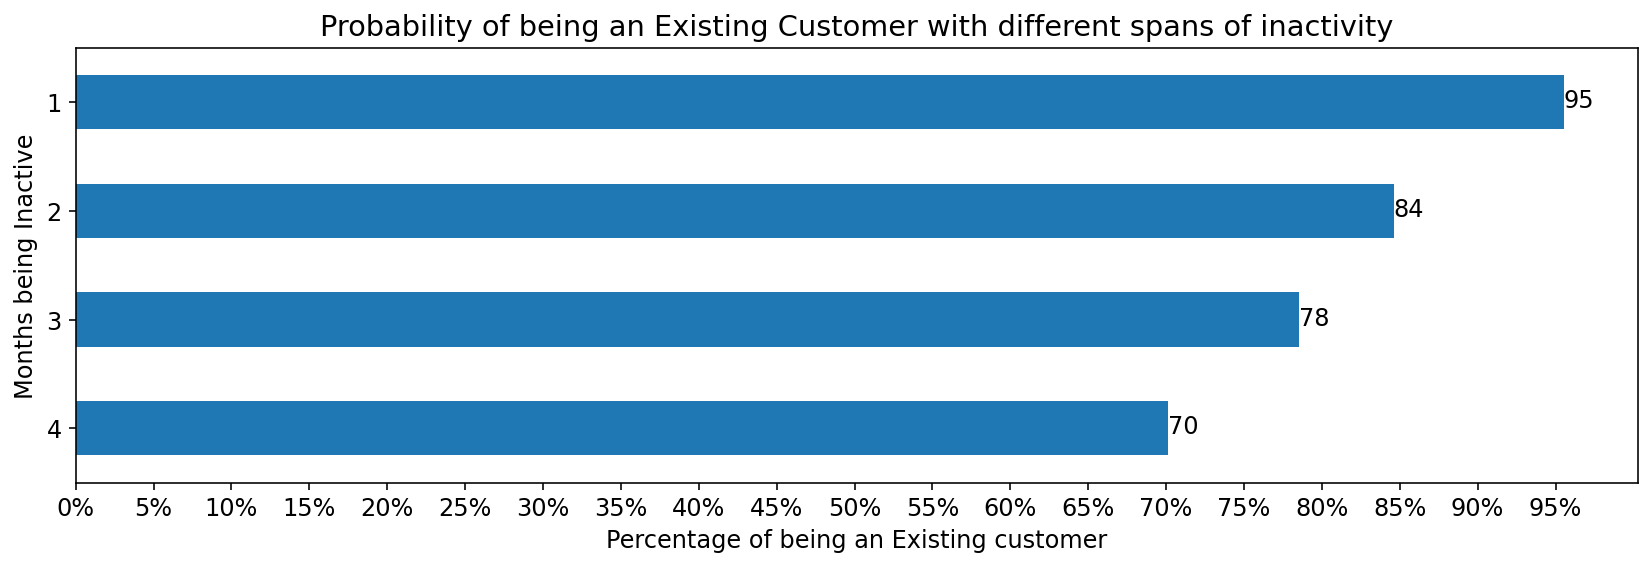

In [6]:
f = df[['Months_Inactive_12_mon','Existing_Customer']].groupby(['Months_Inactive_12_mon']).mean()[1:5].plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i+0.05,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title("Probability of being an Existing Customer with different spans of inactivity");
plt.xlabel('Percentage of being an Existing customer');

plt.ylabel('Months being Inactive');

It's clear that the more months the customer is inactive, the more likely they will cancel and here we can start to act upon it whenever our customer crosses the 1 month inactivity threshold and try to offer them extra services or apply discounts so we can win the customer back.

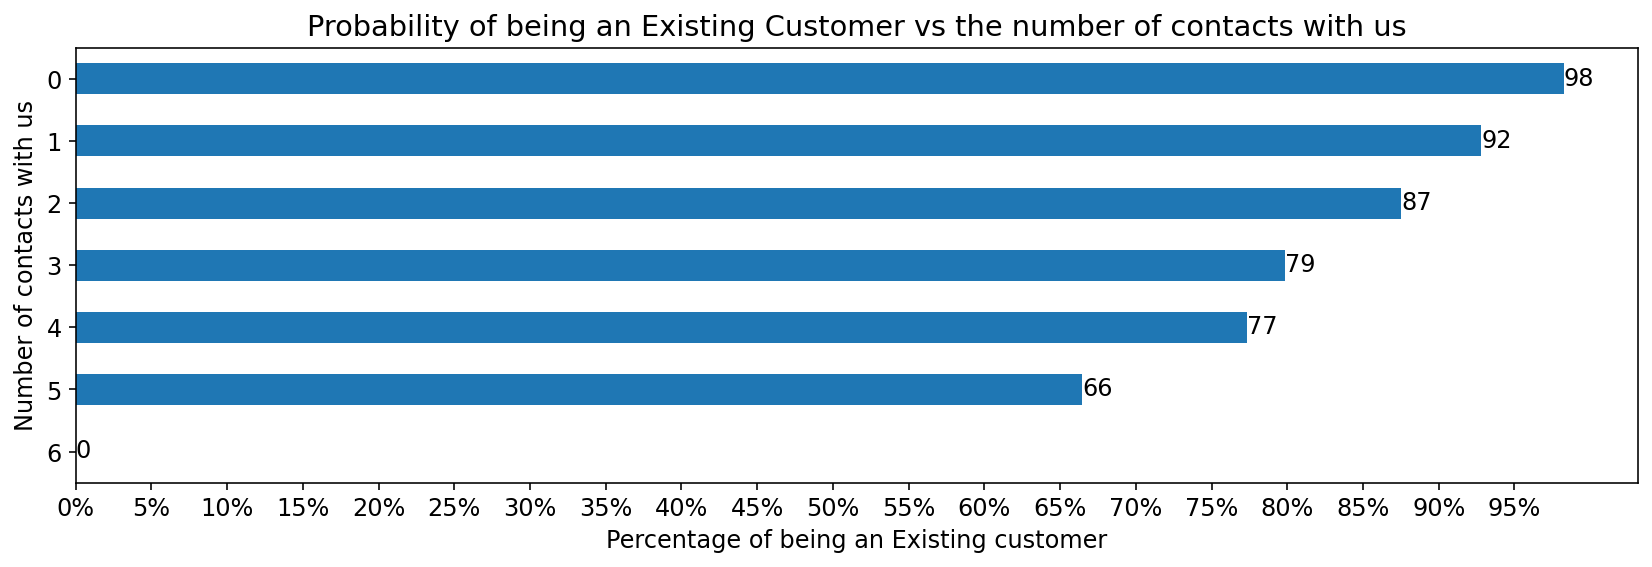

In [7]:
f = df[['Contacts_Count_12_mon','Existing_Customer']].groupby(['Contacts_Count_12_mon']).mean().plot.barh(figsize = [14, 4])
plt.xticks(np.arange(0, 1, 0.05))
vals = f.get_xticks()
f.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
for i,val in enumerate(f.patches):
    width = int(val.get_width() *100)
    f.text(val.get_width(),i+0.1,width)
plt.legend([],[], frameon=False)
f.invert_yaxis()
plt.title("Probability of being an Existing Customer vs the number of contacts with us");
plt.ylabel('Number of contacts with us');
plt.xlabel('Percentage of being an Existing customer');


What is the most fraustrating thing you deal with when you are paying for a service?
It's when you need to correct something that is causing inconviniences by calling the customer service or reaching out to the nearest office.
And here we can see that almost none of the customers that never contacted us cancelled their account but as the number of contacts increases it's more and more likely they will cancel.
In my opinion whenever our customers call reach us twice, we need to make it up for them to make sure we can change their decision,

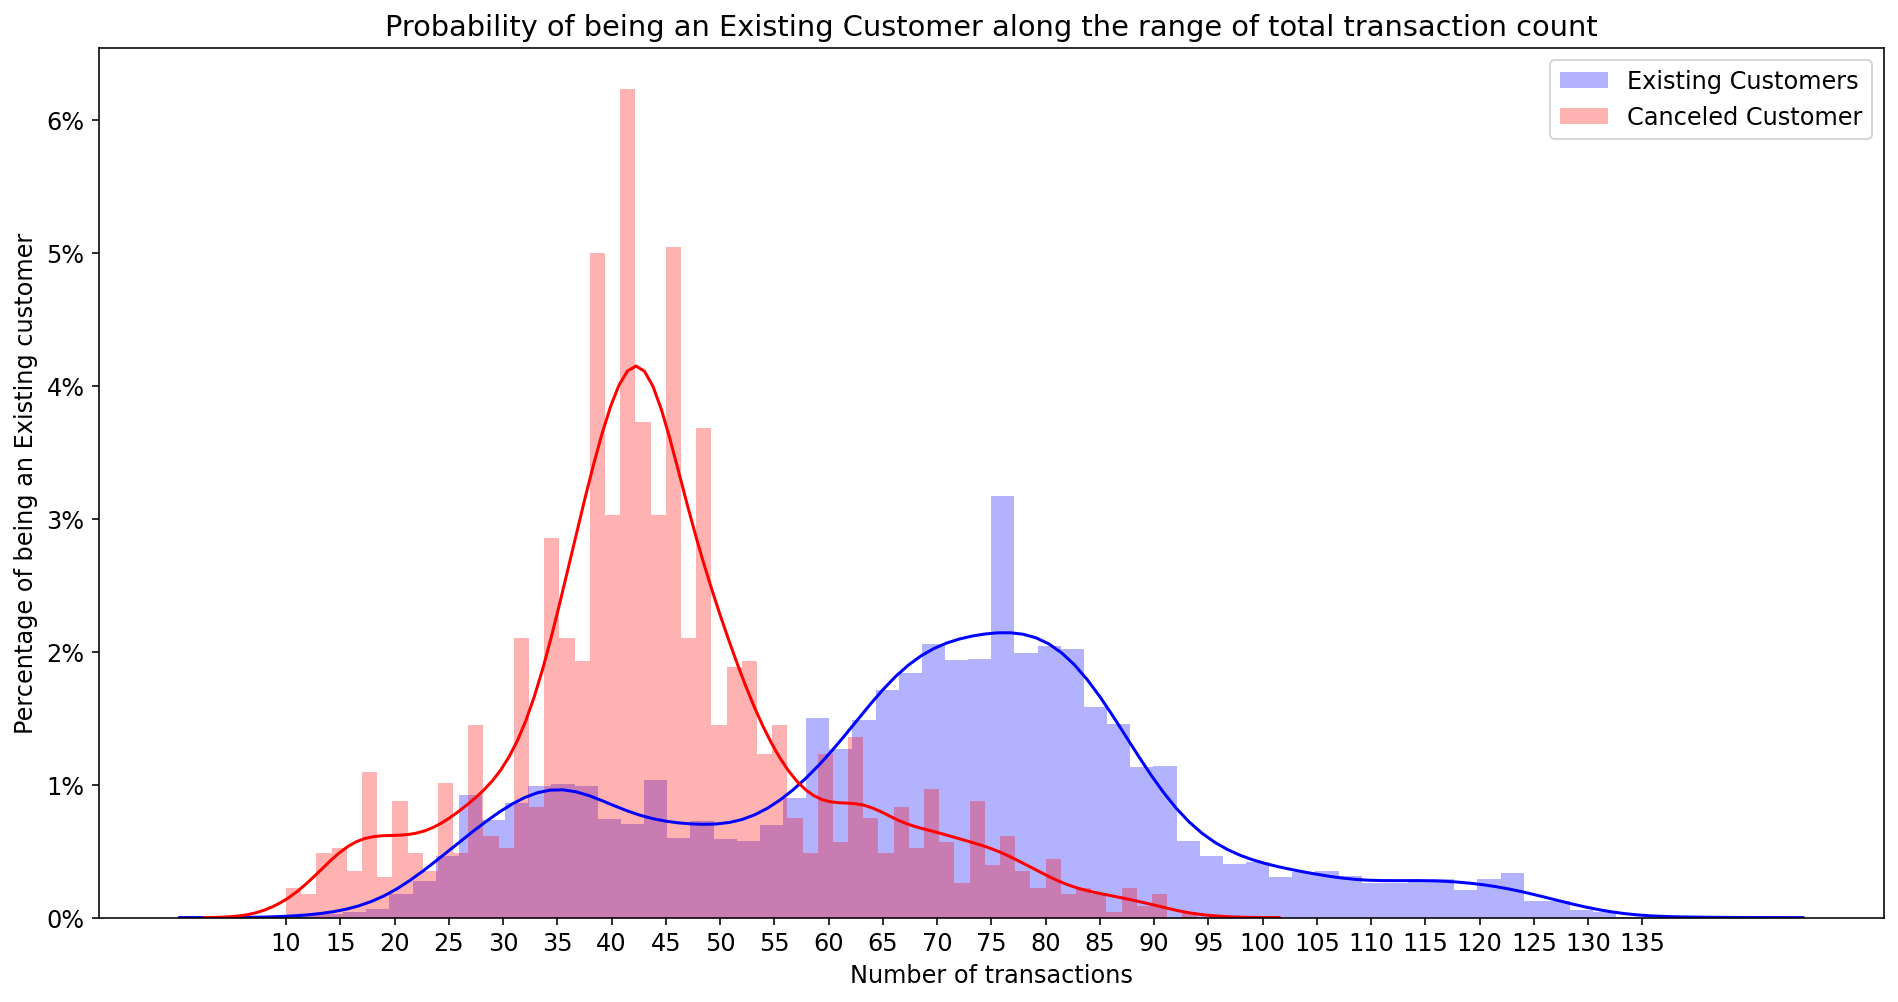

In [8]:
plt.figure(figsize=(16,8))
f = sns.distplot(df[df.Existing_Customer == 1].Total_Trans_Ct,bins=60,hist_kws=dict(alpha=0.3),color='blue',label='Existing Customers')
sns.distplot(df[df.Existing_Customer == 0].Total_Trans_Ct,bins=60,hist_kws=dict(alpha=0.3),color='red',label='Canceled Customer')
plt.xticks((np.arange(min(df.Total_Trans_Ct), max(df.Total_Trans_Ct), 5)))
plt.legend();
plt.title("Probability of being an Existing Customer along the range of total transaction count");
vals = f.get_yticks()
f.set_yticklabels(['{:,.0%}'.format(x) for x in vals]);
plt.xlabel('Number of transactions');
plt.ylabel('Percentage of being an Existing customer');


There are two distinct regions here, seperated around 57 transactions, and hence we can conclude that customers who have a number of transactions that is less than 57 have higher probability that they may cancel.

## Verdict

These were the notable features that had a huge effect on differentiating between existing customers and canceled ones, there are still many more variables that can be feature engineered that can hold more insights and help us build an algorithm that can automatically detect if the customer is about to cancel the service so we can reach out to save the day by lowering churn rate and increasing our customers' satisfaction level which I am sure are our main goals that thrived this study.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:

> jupyter nbconvert Slide show.ipynb --to slides --template output_toggle.tpl

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!